# Car Purchase Dollar Amount Challenge
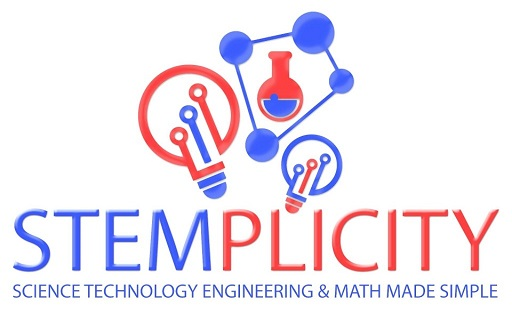

You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay.

In this challenge, we have a dataset of 500 records containing information about:

    •  Customer Name
    •  Customer e-mail
    •  Country
    •  Gender
    •  Age
    •  Annual Salary 
    •  Credit Card Debt 
    •  Net Worth 

#### **Main Objective**: The main objective is to build a regressor for the target variable "Car Purchase Amount".

## Table of Contents

1. [Import Libraries](#1)
2. [Import Data](#2)
    - 2.1. [Data Visualization](#2.1)
3. [Feature Analysis & Feature Engineering](#3)
    - 3.1. [Drop uninformative features](#3.1)
    - 3.2. [Age Column](#3.2)
    - 3.3. [Country Column](#3.3)
4. [One Hot Encoding categorical features](#4)
5. [Train Test Split](#5)
6. [Data Normalization](#6)
7. [Model Training](#7)
8. [Model Evaluation](#8)

# STEP #1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import pycountry_convert as pcc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

#to get reproducible results
from numpy.random import seed
seed(1)
tf.keras.utils.set_random_seed(2)

# STEP #2: Import Data

In [2]:
car_df = pd.read_csv('./data/Car_Purchasing_Data.csv', encoding='ISO-8859-1')
car_df.head()


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
car_df.shape

(500, 9)

## STEP #2.1: Data Visualization

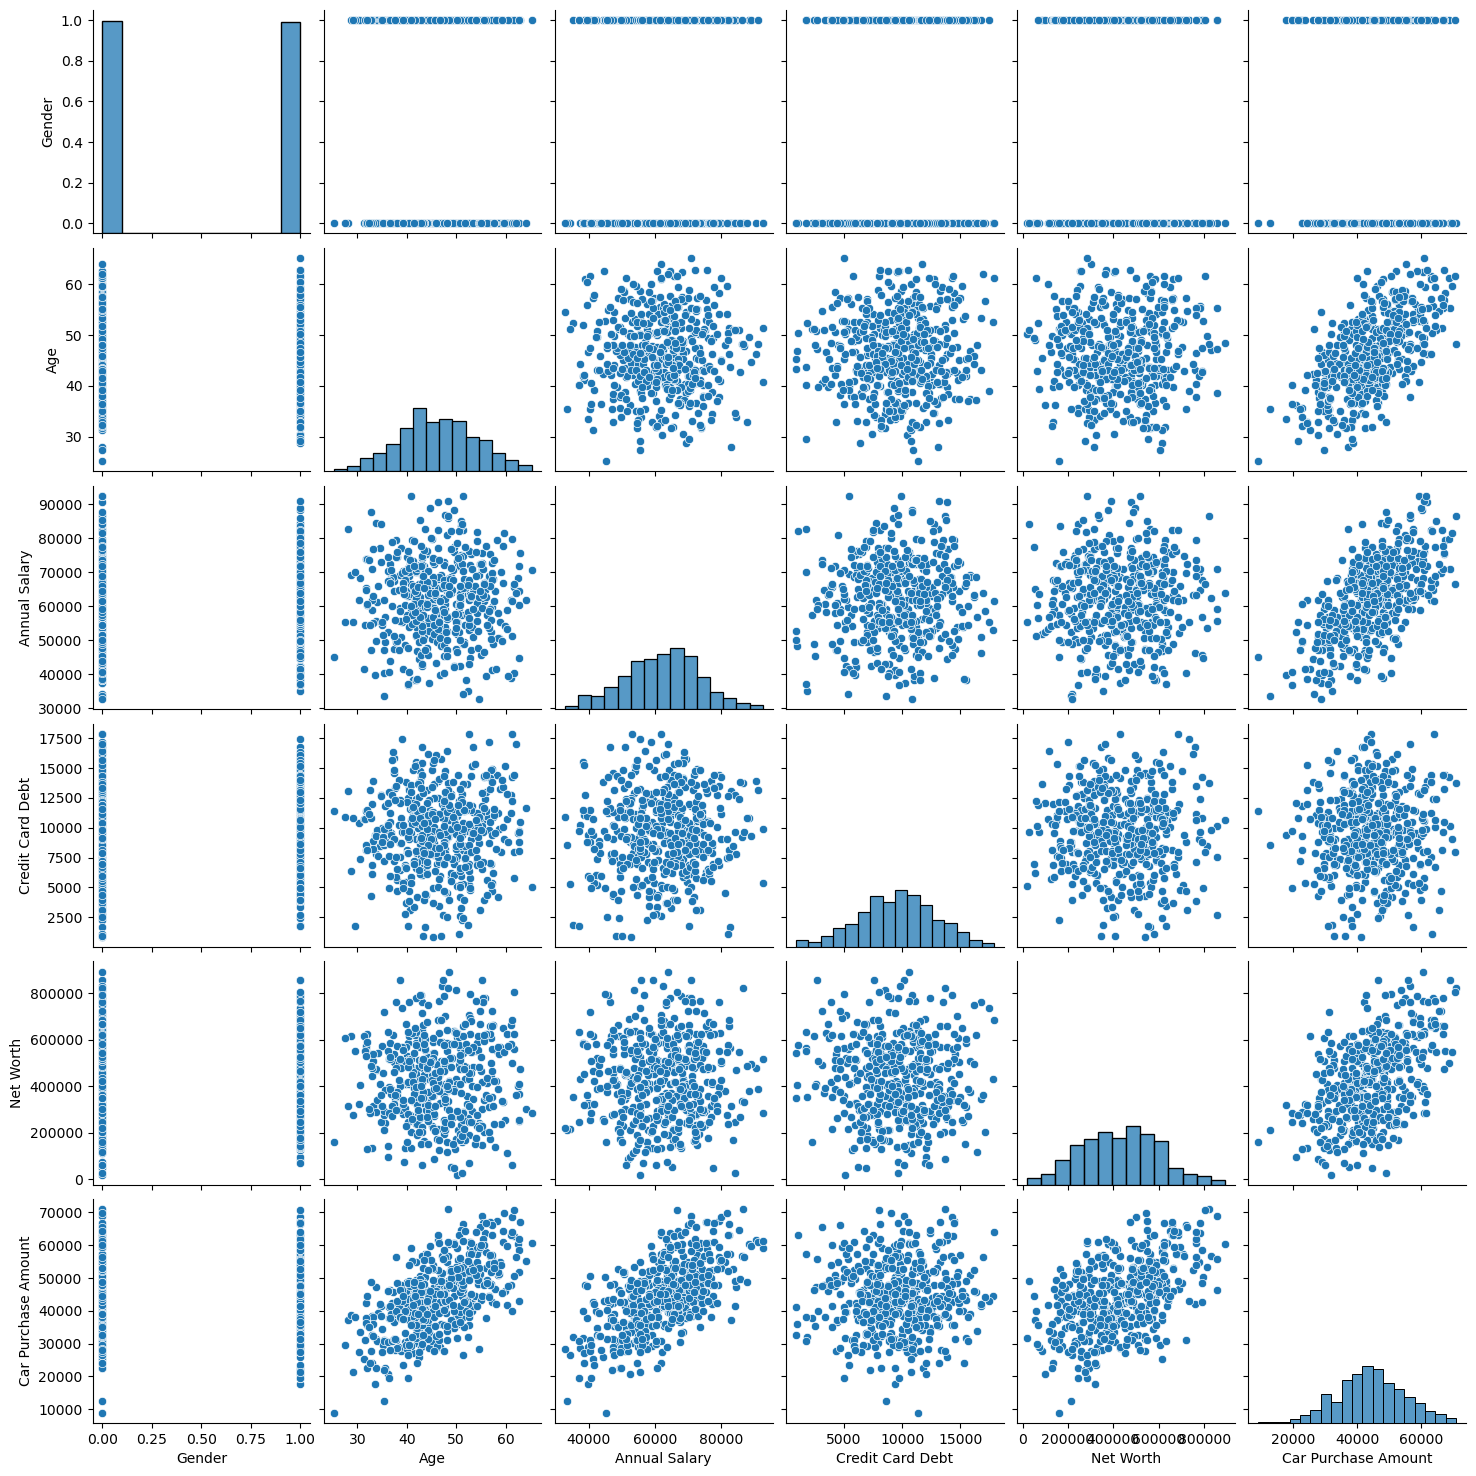

In [9]:
sns.pairplot(car_df)

# STEP #3: Feature Analysis & Feature Engineering
## STEP #3.1: Remove Outliers

In [5]:
def IQR_OutlierRemover(df,column,n):
    #give the function the column that you want to filter and the IQR multiplicator    
    # Compute the IQR
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)
    Iqr = q3 - q1

    # Compute upper and lower limit (lower_limit = Q1 -1.5*IQR | upper_limit = Q3 + 1.5*IQR)
    lower_lim = q1 - n*Iqr
    upper_lim = q3 + n*Iqr

    initial_len = df.shape[0]

    df = df[~((df[column] < lower_lim) | (df[column] > upper_lim))]

    len_afterremov = df.shape[0]

    print(f'Percentage of data kept after removing outliers in column {column}:', np.round(len_afterremov / initial_len * 100, 4),'%')

    return df

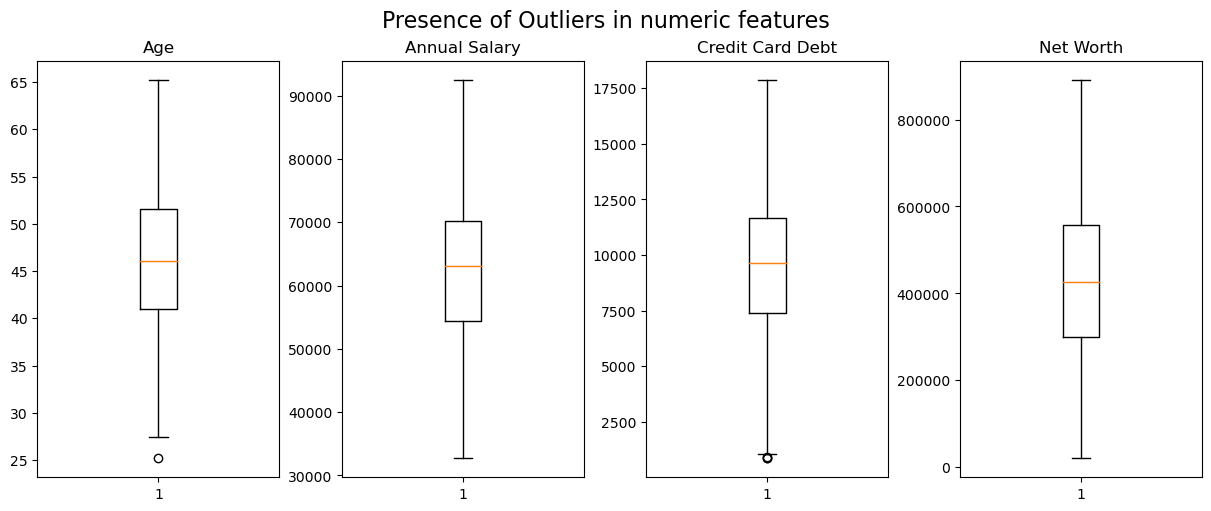

In [10]:
fig, axes = plt.subplots(1,4,figsize=(12, 5),constrained_layout=True)

axes[0].boxplot("Age",data=car_df)
axes[0].set_title('Age')

axes[1].boxplot("Annual Salary",data=car_df)
axes[1].set_title('Annual Salary')

axes[2].boxplot("Credit Card Debt",data=car_df)
axes[2].set_title('Credit Card Debt')

axes[3].boxplot("Net Worth",data=car_df)
axes[3].set_title('Net Worth')

plt.suptitle('Presence of Outliers in numeric features', fontsize=16)
plt.show()

In [7]:
car_df_nooutliers = car_df.copy()
car_df_nooutliers = IQR_OutlierRemover(car_df_nooutliers,'Age',1.5)
car_df_nooutliers = IQR_OutlierRemover(car_df_nooutliers,'Annual Salary',1.5)
car_df_nooutliers = IQR_OutlierRemover(car_df_nooutliers,'Credit Card Debt',1.5)
car_df_nooutliers = IQR_OutlierRemover(car_df_nooutliers,'Net Worth',1.5)
#car_df = IQR_OutlierRemover(car_df,'player_level',1.5)
print('\n')
print("Percentage of data kept after total outlier removal:",car_df_nooutliers.shape[0]/car_df.shape[0] * 100,"%")

Percentage of data kept after removing outliers in column Age: 99.2 %
Percentage of data kept after removing outliers in column Annual Salary: 99.5968 %
Percentage of data kept after removing outliers in column Credit Card Debt: 98.583 %
Percentage of data kept after removing outliers in column Net Worth: 99.7947 %


Percentage of data kept after total outlier removal: 97.2 %


In [8]:
car_df = car_df_nooutliers.copy()

## STEP #3.2: Drop uninformative features

In [9]:
car_df.drop(['Customer Name','Customer e-mail'], axis=1, inplace=True)
car_df.head()

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## STEP #3.3: Age Column

In [10]:
#Round the Age column
car_df['Age'] = car_df['Age'].round(0).astype('int')
car_df.head()

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Bulgaria,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57,59729.15130,5358.712177,560304.0671,55915.46248


## STEP #3.4: Country Column 

In [11]:
#with this function we convert the country name into the continent code 
#doing this I realize that are countries (super small ones!) that are not in the library pycountry_convert (Ex. Sint Maarten)
# so I drop all the columns of people with unknown countries

def country_to_continent(country_name):
    country_alpha2 = pcc.country_name_to_country_alpha2(country_name)
    if country_alpha2 == 'AQ':
        country_continent_code = 'AQ'
    else:
        country_continent_code = pcc.country_alpha2_to_continent_code(country_alpha2)
    return country_continent_code

car_df.loc[car_df['Country'] == 'Sint Maarten', 'Country'] = "Curaçao"
car_df.loc[car_df['Country'] == 'Timor-Leste', 'Country'] = "Indonesia"
car_df.loc[car_df['Country'] == 'Reunion', 'Country'] = "Madagascar"
car_df.loc[car_df['Country'] == 'United States Minor Outlying Islands', 'Country'] = "United States of America"
car_df.loc[car_df['Country'] == 'Heard Island and Mcdonald Islands', 'Country'] = "Australia"
car_df.loc[car_df['Country'] == 'Congo (Brazzaville)', 'Country'] = "Congo"
car_df.loc[car_df['Country'] == 'Virgin Islands, United States', 'Country'] = "United States of America"
car_df.loc[car_df['Country'] == 'French Southern Territories', 'Country'] = "Australia"
car_df.loc[car_df['Country'] == 'Saint Vincent and The Grenadines', 'Country'] = "Venezuela"
car_df.loc[car_df['Country'] == 'Western Sahara', 'Country'] = "Morocco"
car_df.loc[car_df['Country'] == 'United Kingdom (Great Britain)', 'Country'] = "United Kingdom"
car_df.loc[car_df['Country'] == 'South Georgia and The South Sandwich Islands', 'Country'] = "Argentina"
car_df.loc[car_df['Country'] == 'Korea, South', 'Country'] = "South Korea"
car_df.loc[car_df['Country'] == 'marlal', 'Country'] = "Kenya"

car_df['Continent'] = car_df['Country'].apply(lambda x: country_to_continent(x))

car_df.drop(['Country'], axis=1, inplace=True)

car_df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,Continent
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877,EU
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566,NA
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921,AF
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313,OC
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248,SA


# STEP #4: One Hot Encoding categorical features

In [12]:
car_df = pd.get_dummies(car_df,'Continent', drop_first=True)
car_df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,Continent_AN,Continent_AQ,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877,0,0,0,1,0,0,0
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566,0,0,0,0,1,0,0
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921,0,0,0,0,0,0,0
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313,0,0,0,0,0,1,0
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248,0,0,0,0,0,0,1


# STEP #5: TRAIN TEST SPLIT

In [13]:
X = car_df.drop('Car Purchase Amount',axis='columns')
y = car_df['Car Purchase Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP #6: Data Normalization

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [15]:
y_scaler = MinMaxScaler()
y_train = y_train.values.reshape(-1,1)
y_train = y_scaler.fit_transform(y_train)

# STEP #7: Model Training

In [16]:
model = Sequential()
model.add(Dense(25, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                325       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


2022-10-07 17:39:53.811742: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-07 17:39:53.811859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
epochs_hist = model.fit(X_train, y_train, epochs=1000, batch_size=32,  verbose=1, validation_split=0.1,callbacks=[callback])

Epoch 1/1000


2022-10-07 17:39:53.952265: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-07 17:39:54.130422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 19ms/step - loss: 1.1281 - val_loss: 0.8298
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6030 - val_loss: 0.4506
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.3396 - val_loss: 0.2568
Epoch 4/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.2231

2022-10-07 17:39:54.413443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 6ms/step - loss: 0.1991 - val_loss: 0.1473
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.1189 - val_loss: 0.0845
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0764 - val_loss: 0.0582
Epoch 7/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0584 - val_loss: 0.0490
Epoch 8/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0492 - val_loss: 0.0428
Epoch 9/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0403 - val_loss: 0.0362
Epoch 10/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0327 - val_loss: 0.0310
Epoch 11/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0271 - val_loss: 0.0261
Epoch 12/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0226 - val_loss: 0.0222
Epoch 13/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.0192
Epoch 14/

# STEP#5: EVALUATING THE MODEL 

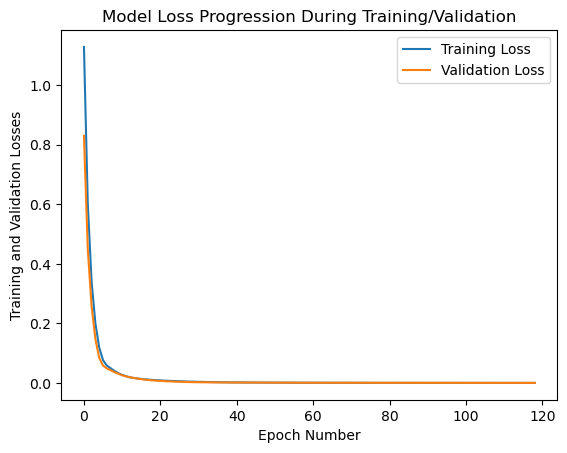

In [19]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [20]:
X_test = scaler.transform(X_test)

In [21]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


2022-10-07 17:40:02.687075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [22]:
y_pred = y_scaler.inverse_transform(y_pred)

In [23]:
from sklearn.metrics import r2_score
print('R2 SCORE:',r2_score(y_test, y_pred))

R2 SCORE: 0.9823134629406005
